In [1]:
# Importing csv files with calcium traces from Steven's MATLAB file "allanimals2.mat"
# Time x Neuron for one animal and one plane
import pandas as pd
import numpy as np
calcium_traces = pd.read_csv("animal6_s1_calcium_traces.csv", index_col=False, header = None)
print(calcium_traces)
print(calcium_traces.index)

              0            1            2             3             4    \
0     4114.841896  5607.701966  8494.582906   1401.381623   9942.774702   
1     4114.841896  5607.701966  8180.927474   1401.381623  15975.618237   
2     4114.841896  5607.701966  9428.633285   1401.381623  14697.587027   
3     4114.841896  5607.701966  8980.097256   1401.381623  16582.847152   
4     4114.841896  5607.701966  8596.331527   1401.381623  15245.878485   
...           ...          ...          ...           ...           ...   
9320  4885.251433  6382.388374  6378.640014  20368.307387  19878.237344   
9321  5988.125170  6304.057882  6370.535944  18293.343910  21762.759459   
9322  5741.999533  6233.647046  6363.602119  22760.508896  19923.029702   
9323  5528.211852  6170.356132  6357.669400  20415.523017  18261.861961   
9324  5342.513448  6113.464468  6352.593281  18327.989811  16761.928947   

              5             6             7             8             9    \
0     3303.965932  107

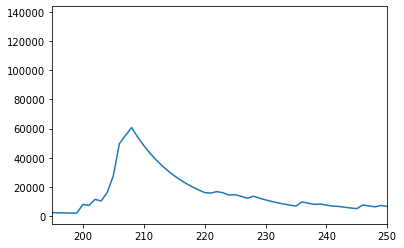

In [2]:
import matplotlib.pyplot as plt
plt.plot(calcium_traces.index, calcium_traces.loc[:,3])
plt.xlim(195,250)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[10294.94741833 16146.74624528 27554.17663377 49627.99033296
 55252.34040106 60627.70460646 54125.33892436 48336.85507554
 43183.88264513 38596.64637953 34513.03351081 30877.75520442
 27641.58929514 24760.71714616 22196.13110068 19913.10824752
 17880.73445712 16071.4915229  15679.55709083 16687.01459226
 15963.58673933 14364.82471456 14590.8038677  13493.0105372
 12165.48916854 13540.05503342 12207.36865311 11020.99574724
  9964.87333282  9024.70002846]
[9.99675578e+00 2.55994153e+00 1.07705030e+05]


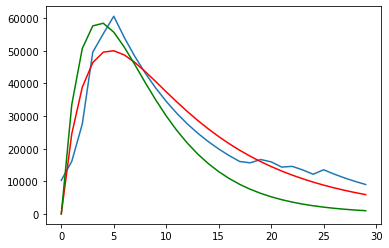

In [25]:
from scipy.optimize import curve_fit
import math
def kernel(x, decay, rise, a):
    return a*(np.exp(-x/decay) - np.exp(-x/rise))
r = range(0,30)
x_values =[]
for i in r:
    x_values.append(i)
x_values = np.array(x_values)
print(x_values)
y_values = np.array(calcium_traces.loc[203:232,3])
print(y_values)

plt.plot(x_values,y_values)
# fit curve
popt, _ = curve_fit(kernel, x_values, y_values, bounds=([0.01,0.01,0.01], [100, 4,2000000]))
print(popt)
#print(kernel(x_values,1,1))
plt.plot(x_values, list(kernel(x_values,popt[0],popt[1],popt[2])), color = 'red')
plt.plot(x_values, list(kernel(x_values, 5.32 , 2.62, 230000)), color = 'green')
#GO WITH GREEN ONE: convolving function in python CHECK GOGOLLA NEURON CORRELATIONS what they used for input data
plt.show()

In [4]:
# decay and rise are constant for GCaMP6 taken from "Decoupling Sponatenous Activity.." paper
decay = 5.32
rise = 2.62
ampl = 230000

In [6]:
fps = 15.49/3
stim_times = pd.read_csv("stim_times_calcium_traces.csv")
stim_times = stim_times.drop(columns = "Unnamed: 0")
#print(stim_times) 
traces_all = pd.read_csv("calcium_traces_all.csv")
traces_all = traces_all.drop(columns = "Unnamed: 0")
#print(traces_all)
traces_stimulus = pd.read_csv("traces_stimulus_intervals_all.csv")
traces_stimulus = traces_stimulus.drop(columns = "Unnamed: 0")
#print(traces_stimulus)
traces_stimulus_reordered = pd.read_csv("traces_stimulus_reordered_all.csv")
traces_stimulus_reordered = traces_stimulus_reordered.drop(columns = 'Unnamed: 0')
#print(traces_stimulus_reordered)
traces_average = pd.read_csv("traces_average_batch1.csv", index_col = False)
traces_average = traces_average.drop(columns = 'Unnamed: 0')
#print(traces_average)

traces_normalized = pd.read_csv("traces_normalized_batch1.csv")
traces_normalized = traces_normalized.drop(columns = 'Unnamed: 0')
#print(traces_normalized)

traces_average_normalized = pd.read_csv("traces_average_normalized_batch1.csv")
traces_average_normalized = traces_average_normalized.drop(columns = 'Unnamed: 0')
#print(traces_average_normalized)

In [15]:
# all neurons from s1, s2, s3 put together on columns 
# each neuron is standardized
# not in chronological order, 10 of shock, 10 of shockCTRL, etc.
from sklearn.preprocessing import StandardScaler
def animal_none(animall):

    s1 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    
    #Standardization happens for time period of all cut trials from all stimuli
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    
    return animal_scaled

# subtracting baseline for each trial - NOT in chronological order
def animal_normalized(animall):

    s1 = traces_normalized[traces_normalized['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_normalized[traces_normalized['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_normalized[traces_normalized['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    
    #Standardization happens for time period of all cut trials from all stimuli
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    
    return animal_scaled

# all neurons put together with whole calcium traces (NOT cut to intervals of stimuli)
def animal_all(animall):

    s1 = traces_all[traces_all['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_all[traces_all['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_all[traces_all['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    
    
    #Standardization happens for time period of all cut trials from all stimuli
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    
    return animal_scaled



In [18]:
# preparing similarity index (reordered like the neural activity) 10 shock, 10 shock CTRL...10 squeakCTRL
#Doing var2 here - zeroed or non zeroed
pd.options.display.float_format = "{:,.6f}".format
sec = 5
fps = 15.49/3
frames_interval = int(sec * fps)
total_frames = 2 * frames_interval + 1
#frames interval is 25, total frames is 51
def similarity_index_trials(animall, var):
    similarity = pd.read_csv('similarity_index_facial_expressions_var2_' + str(var) + '_animal' + str(animall) + ".csv", index_col = 0)
    
    temp = pd.DataFrame.copy(similarity, deep = True)
    times = stim_times[stim_times['animal'] == animall]
    times = times[times['s']==2]
    times = times.sort_values(by="value", ignore_index = True)
    keeping = []
    for val in times['value']:
        for add in range(-frames_interval,frames_interval+1):
            keeping.append(val+add)
    dropping = list(set(temp.index).difference(keeping))
    temp = temp.drop(temp.index[dropping], inplace = False)
    indices = pd.DataFrame(data = temp.index, columns = ['index'])
    temp = temp.reset_index(drop = True)
    temp['stimulus'] = pd.Series(dtype = str)
    z = 0
    for stim in times['stimulus']:
        for add in range(0,total_frames):
            temp.at[z,'stimulus'] = stim
            z = z + 1
 

    similarity_stimulus = pd.DataFrame.copy(temp, deep = True)
    similarity_stimulus = pd.concat([similarity_stimulus,indices], axis = 1)
    #print(similarity_stimulus)
    
    similarity_stimulus_reordered = pd.DataFrame(columns = similarity_stimulus.columns)
    for stim in ['shock','shockCTRL','laserHI','laserLO','laserCTRL','squeak','squeakCTRL']:
        times = stim_times[stim_times['animal'] == animall]
        times = times[times['s']==2]
        times = times[times['stimulus']==stim]
        temp = pd.DataFrame.copy(similarity_stimulus, deep = True)
            
        # ind is all indices (in dataframe of that animal and plane) for a particular stimulus
        ind = []
        z = 0
        for val in times['value']:
            for add in range(-frames_interval,frames_interval+1):
                z = z + 1
                ind.append(temp.index[temp['index'] == val+add].tolist()[0])
        dropping = list(set(temp.index).difference(ind))
        temp = temp.drop(temp.index[dropping], inplace = False)
        temp['stimulus']=pd.Series(dtype= str)
        temp['stimulus']=stim
        similarity_stimulus_reordered = pd.concat([similarity_stimulus_reordered,temp], ignore_index = True)
    
    #print(similarity_stimulus_reordered)
    
    similarity_stimulus = similarity_stimulus.drop(columns = "index")
    similarity_stimulus_reordered = similarity_stimulus_reordered.drop(columns = "index")
    
    return similarity_stimulus_reordered
    


  
similarity_index_trials(11, "nonzeroed")
    

,laserHI,laserLO,laserCTRL,shock,shockCTRL,squeak,squeakCTRL,baseline,stimulus
0,-0.000125,-0.000152,-0.000093,0.000006,-0.000018,-0.000049,-0.000034,0.999973,shock
1,-0.000024,-0.000028,-0.000008,-0.000024,-0.000019,0.000004,0.000002,0.999989,shock
2,-0.000009,-0.000005,0.000023,-0.000064,-0.000033,0.000044,0.000021,0.999989,shock
3,-0.000002,0.000005,0.000026,-0.000066,-0.000028,0.000052,0.000027,0.999990,shock
4,0.000020,0.000033,0.000048,-0.000089,-0.000035,0.000072,0.000039,0.999989,shock
...,...,...,...,...,...,...,...,...,...
3565,0.000206,0.000335,0.000274,-0.000797,-0.000482,0.000209,-0.000000,0.999716,squeakCTRL
3566,0.000208,0.000341,0.000276,-0.000810,-0.000490,0.000208,-0.000005,0.999709,squeakCTRL
3567,0.000218,0.000343,0.000284,-0.000728,-0.000428,0.000211,0.000007,0.999746,squeakCTRL
3568,0.000171,0.000286,0.000256,-0.000729,-0.000422,0.000209,0.000008,0.999744,squeakCTRL


none
               r
56.s3  -0.297338
0.s3   -0.274668
46.s2  -0.246664
138.s2 -0.241737
151.s1 -0.223704
...          ...
17.s1   0.252544
10.s1   0.255509
139.s1  0.260159
11.s2   0.267224
59.s1   0.284048

[454 rows x 1 columns]
none


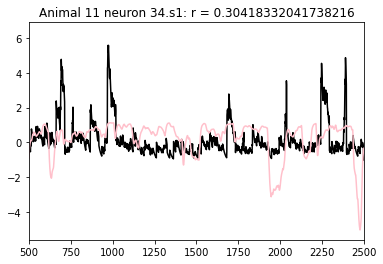

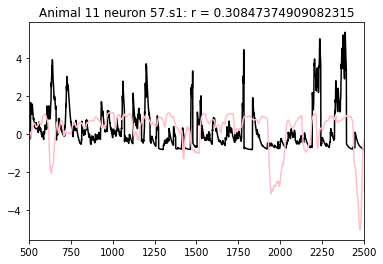

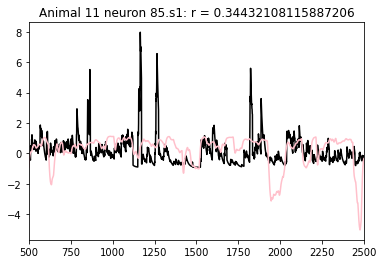

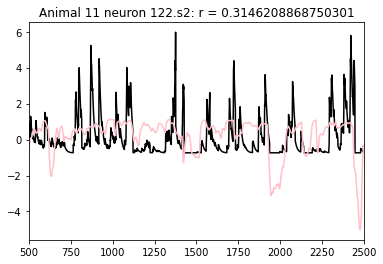

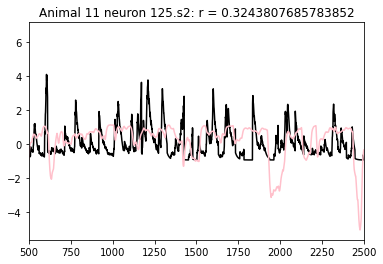

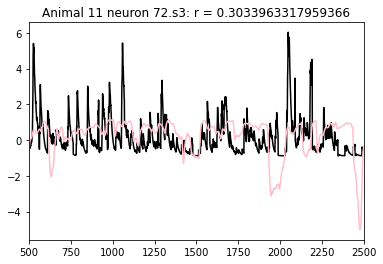

               r
17.s3  -0.419812
155.s1 -0.376607
56.s3  -0.366366
0.s3   -0.359195
43.s2  -0.333303
...          ...
34.s1   0.304183
57.s1   0.308474
122.s2  0.314621
125.s2  0.324381
85.s1   0.344321

[454 rows x 1 columns]
none


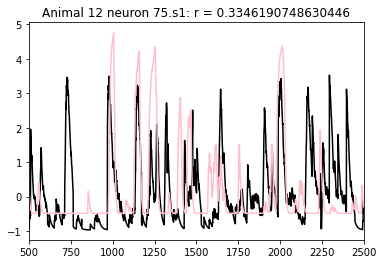

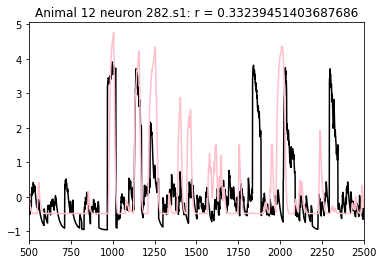

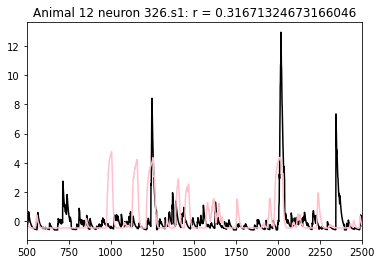

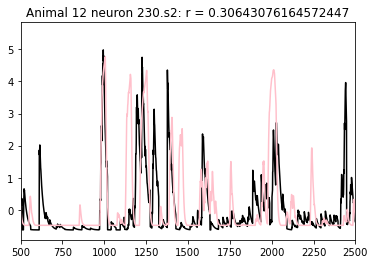

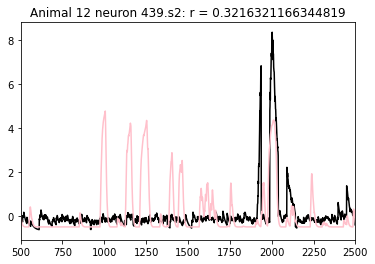

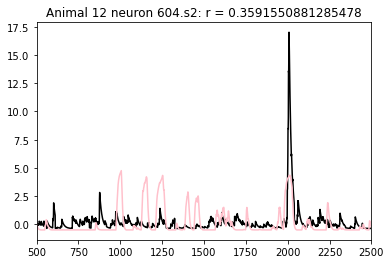

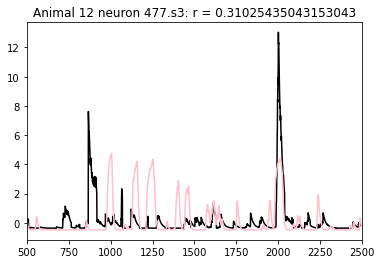

               r
427.s2 -0.172023
603.s2 -0.170635
580.s2 -0.159439
215.s3 -0.159281
460.s2 -0.156381
...          ...
326.s1  0.316713
439.s2  0.321632
282.s1  0.332395
75.s1   0.334619
604.s2  0.359155

[1493 rows x 1 columns]
none
               r
105.s2 -0.367809
66.s1  -0.356985
250.s3 -0.346541
369.s2 -0.338617
287.s1 -0.312649
...          ...
230.s2  0.198702
439.s2  0.203882
545.s2  0.203898
574.s2  0.232382
383.s3  0.278872

[1493 rows x 1 columns]


In [65]:
# Try Similarit Index calculated as distance from prototype rather than correlation
stim = "shock"
from scipy.stats import pearsonr
for animall in [11,12]: #,12
    for var in ["zeroed","nonzeroed"]: #"nonzeroed",
        for typee in ["none"]: #,"normalized" peforms bad
            print(typee)
            if(typee == "none"):
                animal = animal_none(animall)
            elif(typee == "normalized"):
                animal = animal_normalized(animall)
            animal = animal.drop(columns = ["stimulus"])
            
            #Checking laserHI first
            similarity = similarity_index_trials(animall, var)
            similarity = similarity[stim]
                
            for ind in similarity.index:
                if(ind in similarity[similarity.isna().isin([True])].index):
                    if(similarity.iat[ind-1] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind-1]
                    elif(similarity.iat[ind] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind+1]
                    elif(similarity.iat[ind-2] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind-2]
                    elif(similarity.iat[ind+2] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind+2]
                    elif(similarity.iat[ind-3] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind-3]
                    elif(similarity.iat[ind+3] != np.nan):
                            similarity.iat[ind] = similarity.iat[ind+3]
            
            corr = pd.DataFrame(index = animal.columns, columns = ["r"])
            for neuron in animal.columns:
                con = np.convolve(np.array(similarity[:]),list(kernel(x_values, decay , rise, 1)),"same")
                con_scaled = StandardScaler().fit_transform(con.reshape(-1, 1))
                corr.at[neuron,"r"],_ = pearsonr(con_scaled.flatten(), np.array(animal.loc[:,neuron]))
                if(corr.at[neuron,"r"] > 0.3):
                    plt.plot(range(0,3570),np.array(animal.loc[:,neuron]), "black")
                    plt.plot(range(0,3570), con_scaled, "pink")
                    plt.title("Animal " + str(animall) + " neuron " + str(neuron) + ": r = " + str(corr.at[neuron,"r"]))
                    plt.xlim(500,2500)
                    plt.show()
            print(corr.sort_values("r"))
            
                